In [108]:
import numpy as np
import pandas as pd

## Get the train and test data

In [109]:
train = pd.read_csv('UCI_HAR_DATA/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_DATA/csv_files/test.csv')
print(train.shape, test.shape)



(7352, 564) (2947, 564)


In [110]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [111]:
# get X_train and y_train from csv files
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

# get X_test and y_test from test csv file
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


In [112]:
# # get X_test and y_test from test csv file
# X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
# y_test = test.ActivityName

In [113]:
# print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
# print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

## Labels for Confusion Matrix

In [114]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Function for Plotting Confusion Matrix

In [128]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'Times New Roman'

def plot_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    ax = plt.gca()
    ax.set_ylim(-.5, 5.5)
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Function that lets you run any specific model

In [129]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Reds):
    
    
    # use dictionary to update results as needed
    results = dict()
    
    # keeping track of time to see how long each model takes 
    train_start_time = datetime.now()
    print('training model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('      Accuracy       ')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('  Confusion Matrix  ')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    ax = plt.gca()
    ax.set_ylim(-.5,5.5)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('  Classifiction Report  ')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

## Function prints GridSearch Attributes of each ML model

In [130]:
def get_gs_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('      Best Estimator      ')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('     Best parameters      ')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('   No of CrossValidation sets    ')
    print('--------------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('        Best Score        ')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

## Logistic Regression Model

training model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/

Done 
 

training_time(HH:MM:SS.ms) - 0:00:06.930242


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008858


---------------------
      Accuracy       
---------------------

    0.9586019681031558


--------------------
  Confusion Matrix  
--------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 405  11]
 [  0   0   0  24   1 446]]


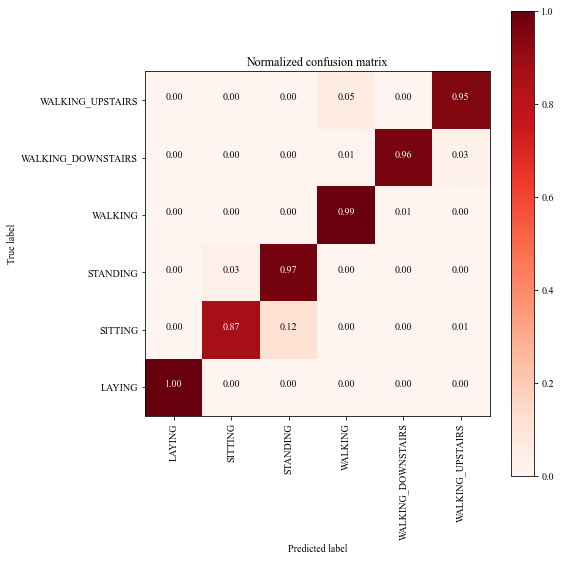

-------------------------
  Classifiction Report  
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [131]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV


# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)



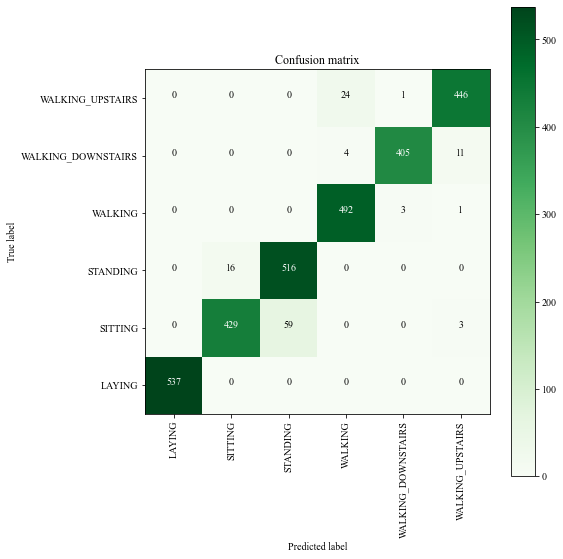

In [132]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [133]:
# observe the attributes of the model 
get_gs_attributes(log_reg_grid_results['model'])

--------------------------
      Best Estimator      
--------------------------

	LogisticRegression(C=1)

--------------------------
     Best parameters      
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
   No of CrossValidation sets    
--------------------------------

	Total number of cross validation sets: 3

--------------------------
        Best Score        
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9377055595800132



## KNN Model
plots normalized confusion matrix in terms of accuracy

training model..
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.067303


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.550506


---------------------
      Accuracy       
---------------------

    0.9056667797760435


--------------------
  Confusion Matrix  
--------------------

 [[535   1   1   0   0   0]
 [  0 400  87   0   0   4]
 [  0  37 495   0   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  53 325  42]
 [  0   0   0  41   5 425]]


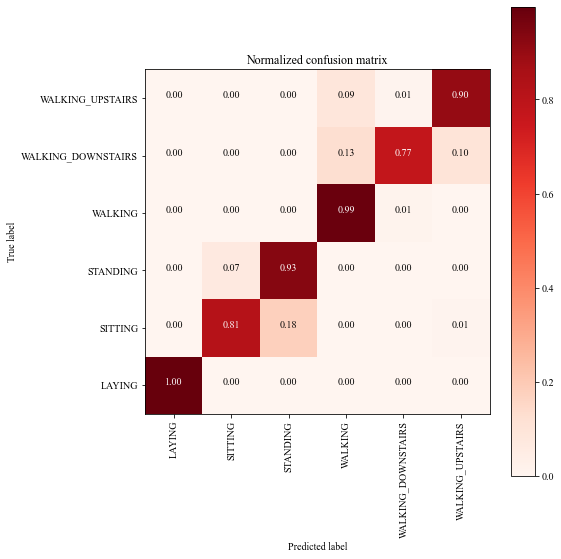

-------------------------
  Classifiction Report  
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.85      0.93      0.89       532
           WALKING       0.84      0.99      0.91       496
WALKING_DOWNSTAIRS       0.96      0.77      0.86       420
  WALKING_UPSTAIRS       0.90      0.90      0.90       471

          accuracy                           0.91      2947
         macro avg       0.91      0.90      0.90      2947
      weighted avg       0.91      0.91      0.90      2947



In [134]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [1, 10, 11, 20, 30]}
log_knn = KNeighborsClassifier(n_neighbors=6)

log_knn_grid = GridSearchCV(log_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_knn_grid_results =  perform_model(log_knn_grid, X_train, y_train, X_test, y_test, class_labels=labels)


Plots confusion matrix showing down to the number, how many were predicted correctly/incorrectly

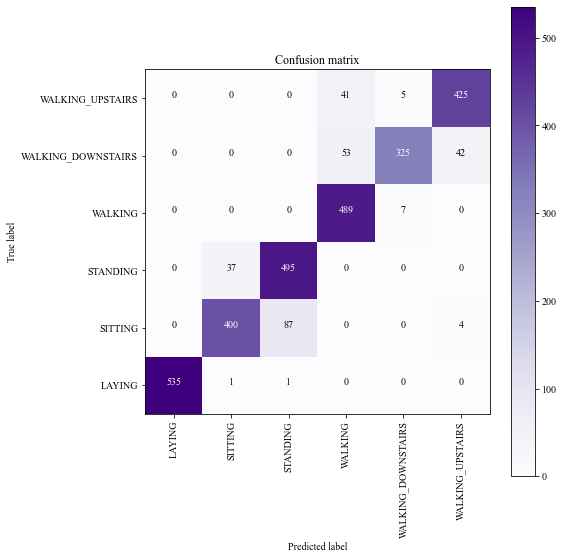

In [135]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_matrix(log_knn_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Purples, )

plt.show()

In [136]:
# observe the attributes of the model 
get_gs_attributes(log_knn_grid_results['model'])

--------------------------
      Best Estimator      
--------------------------

	KNeighborsClassifier(n_neighbors=20)

--------------------------
     Best parameters      
--------------------------
	Parameters of best estimator : 

	{'n_neighbors': 20}

---------------------------------
   No of CrossValidation sets    
--------------------------------

	Total number of cross validation sets: 3

--------------------------
        Best Score        
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8939084699567301



## Linear SVC with GridSearch
plots normalized confusion matrix in terms of % accuracy

In [137]:
from sklearn.svm import LinearSVC

training model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/parkerbath/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985

Done 
 

training_time(HH:MM:SS.ms) - 0:00:14.744740


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012951


---------------------
      Accuracy       
---------------------

    0.9667458432304038


--------------------
  Confusion Matrix  
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


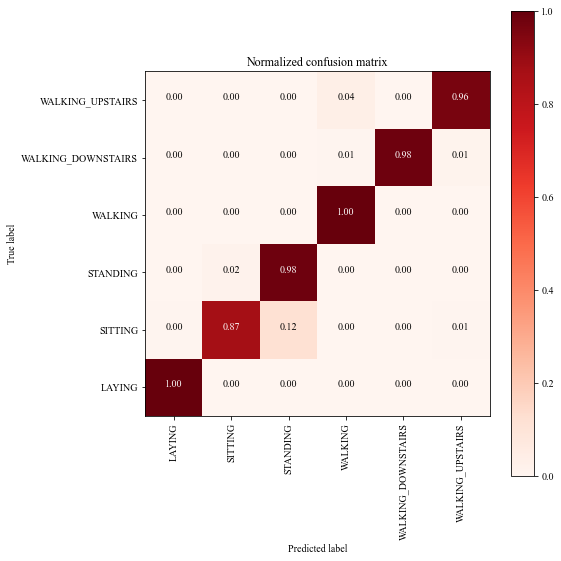

-------------------------
  Classifiction Report  
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [138]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
get_gs_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9422003634900594



## Kernel SVM with GridSearch
plots normalized confusion matrix for this model and returns best estimators and parameters

training model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:16.048978


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.944264


---------------------
      Accuracy       
---------------------

    0.9626739056667798


--------------------
  Confusion Matrix  
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


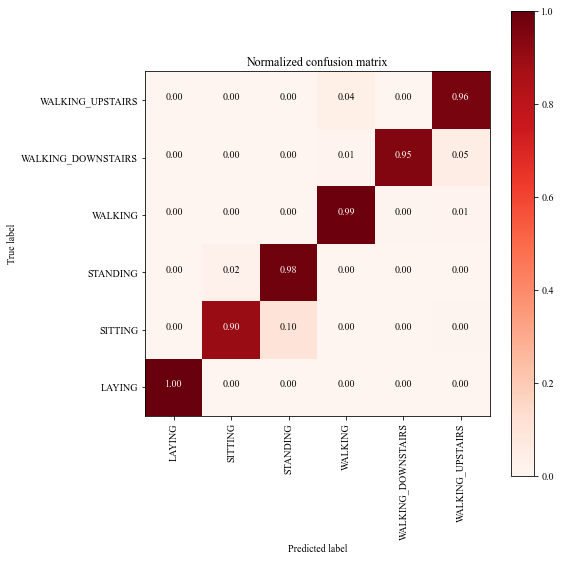

-------------------------
  Classifiction Report  
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

--------------------------
      Best Estimator      
--------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
     Best parameters      
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
   No of CrossValidation set

In [126]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)
get_gs_attributes(rbf_svm_grid_results['model'])

## Decion Tree Classifier with GridSearchCV
plots confusion matrix and returns best estimator and parameters

training model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:07.788338


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.011939


---------------------
      Accuracy       
---------------------

    0.838140481845945


--------------------
  Confusion Matrix  
--------------------

 [[537   0   0   0   0   0]
 [  0 399  92   0   0   0]
 [  0 113 419   0   0   0]
 [  0   0   0 470  10  16]
 [  0   0   0  49 266 105]
 [  0   0   0  86   6 379]]


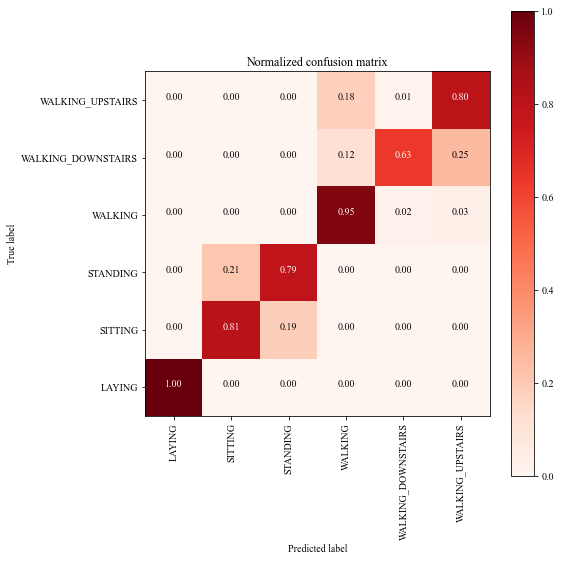

-------------------------
  Classifiction Report  
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.78      0.81      0.80       491
          STANDING       0.82      0.79      0.80       532
           WALKING       0.78      0.95      0.85       496
WALKING_DOWNSTAIRS       0.94      0.63      0.76       420
  WALKING_UPSTAIRS       0.76      0.80      0.78       471

          accuracy                           0.84      2947
         macro avg       0.85      0.83      0.83      2947
      weighted avg       0.85      0.84      0.84      2947

--------------------------
      Best Estimator      
--------------------------

	DecisionTreeClassifier(max_depth=5)

--------------------------
     Best parameters      
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5}

---------------------------------
   No of CrossValidation sets   

In [105]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
get_gs_attributes(dt_grid_results['model'])

## Random Forest Classifier with GridSearch
plots normalized confusion matrix
returns best parameters and estimators

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:03:02.059177


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.040335


---------------------
|      Accuracy      |
---------------------

    0.9212758737699356


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 430  61   0   0   0]
 [  0  48 484   0   0   0]
 [  0   0   0 477  13   6]
 [  0   0   0  22 353  45]
 [  0   0   0  31   6 434]]


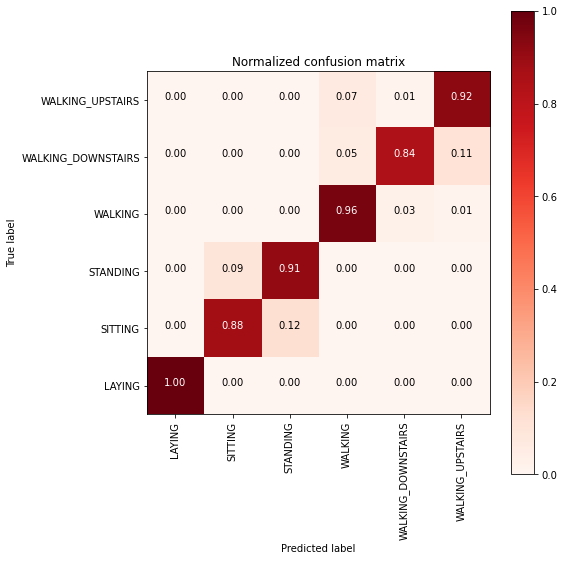

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.88      0.89       491
          STANDING       0.89      0.91      0.90       532
           WALKING       0.90      0.96      0.93       496
WALKING_DOWNSTAIRS       0.95      0.84      0.89       420
  WALKING_UPSTAIRS       0.89      0.92      0.91       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=11, n_estimators=130)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 11, 'n_estimators': 130}

-----------------------

In [86]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
get_gs_attributes(rfc_grid_results['model'])

## Compare all of the Models

In [142]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('KNN                 : {:.04}%       {:.04}% '.format(log_knn_grid_results['accuracy'] * 100,\
                                                        100-(log_knn_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 95.86%       4.14%
KNN                 : 90.57%      9.433% 
Linear SVC          : 96.67%       3.325% 
rbf SVM classifier  : 96.27%      3.733% 
DecisionTree        : 83.81%      16.19% 
Random Forest       : 92.13%      7.872% 
